In [80]:
!pip install fastkml

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 3.3 MB/s eta 0:00:00


In [115]:
import os
import zipfile

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from glob import glob
from lxml import etree
from fastkml import kml
from pykml import parser

In [7]:
def convert_kmz_to_kml(kmz_file_path):
    """
    Converts a KMZ file to a KML file by extracting its internal KML file.
    """
    if not os.path.exists(kmz_file_path):
        raise FileNotFoundError(f"File not found: {kmz_file_path}")

    kml_file_path = os.path.splitext(kmz_file_path)[0] + ".kml"

    with zipfile.ZipFile(kmz_file_path, 'r') as kmz:
        for file_name in kmz.namelist():
            if file_name.endswith('.kml'):
                with kmz.open(file_name) as kml_file:
                    with open(kml_file_path, 'wb') as output_kml:
                        output_kml.write(kml_file.read())
                return kml_file_path

    raise ValueError("No KML file found inside the KMZ.")

In [125]:
# convert_kmz_to_kml("Centros Comerciales.kmz")

In [134]:
# Lista para almacenar los datos
data_list = []

# Procesar los datos encontrados
for data in extended_data:
    row = {}
    for schema_data in data.findall('.//kml:SchemaData', namespaces):
        for simple_data in schema_data.findall('.//kml:SimpleData', namespaces):
            row[simple_data.attrib['name']] = simple_data.text
    data_list.append(row)

# Convertir a DataFrame
df = pd.DataFrame(data_list)

dist = gpd.read_file("Distritos_de_planificacion.kml")
df['geometry'] = dist['geometry']
df

,FID,OBJECTID,PROV,CANTON,PARROQUIA,DENOMINACI,NUMERACION,CENTRALIDA,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,geometry
0,1,1,GUAYAS,GUAYAQUIL,PARROQUIA XIMENA,SUR II,3,GUASMO,23447.7015219,25438156.7398,25659857.4628906,23552.3889491184,"POLYGON ((-79.90877 -2.22605, -79.9088 -2.2263..."
1,2,2,GUAYAS,GUAYAQUIL,PARROQUIA XIMENA,SUR I,2,ASTILLERO SUR - ALMENDROSS,15345.2546543,8936834.91312,9014240.47485352,15409.0540961748,"POLYGON ((-79.90609 -2.21628, -79.9059 -2.2156..."
2,3,3,GUAYAS,GUAYAQUIL,"PARROQUIAS ROCAFUERTE, ROCA, PEDRO CARBO, TARQUI",CENTRO,1,CENTRO URBANO,13641.7942132,8597173.29199,8671296.68884277,13697.8143699764,"POLYGON ((-79.87229 -2.17845, -79.8722 -2.1789..."
3,4,4,GUAYAS,GUAYAQUIL,PARROQUIA TARQUI,CENTRO NORTE I,9,URDESA,27160.9862509,20644260.7713,20822242.0339355,27286.9238416223,"POLYGON ((-79.94527 -2.17381, -79.94523 -2.173..."
4,5,5,GUAYAS,GUAYAQUIL,PARROQUIA TARQUI,NORTE I,5,KENNEDY ORELLANA,17351.4899164,14379892.665,14503255.5164795,17437.5533650731,"POLYGON ((-79.90154 -2.16835, -79.9015 -2.1682..."
5,6,6,GUAYAS,GUAYAQUIL,PARROQUIA TARQUI,NORTE II,6,ALBORADA/SAUCES,17189.5791977,17056230.0112,17201667.5296631,17279.327173125,"POLYGON ((-79.88708 -2.09415, -79.88626 -2.095..."
6,7,7,GUAYAS,GUAYAQUIL,PARROQUIA TARQUI,CENTRO NORTE II,10,MARTHA DE ROLDÓS - FLORIDA,25138.0153587,22304362.9432,22495465.3359375,25259.0110700985,"POLYGON ((-79.91025 -2.10186, -79.9083 -2.1097..."
7,8,8,GUAYAS,GUAYAQUIL,"PARROQUIA PASCUALES, EXPANSION URBANA",NOROESTE III,13,MONTE SINAHÍ,35859.8573375,28222314.0042,28464399.2692871,35940.9625665786,"POLYGON ((-79.97345 -2.12065, -79.97342 -2.120..."
8,9,9,GUAYAS,GUAYAQUIL,PARROQUIA PASCUALES,NOROESTE II,12,NOROESTE,24702.4522545,17242089.9807,17389754.3074951,24732.1625660005,"POLYGON ((-79.95567 -2.08455, -79.955 -2.08469..."
9,10,10,GUAYAS,GUAYAQUIL,"PARROQUIA TARQUI, PASCUALES",NOROESTE I,11,PASCUALES - BASTIÓN POPULAR,30743.3953618,21694079.3212,21878916.204834,30892.2908962153,"POLYGON ((-79.92148 -2.10513, -79.92161 -2.105..."


In [139]:
malls = gpd.read_file("Centros Comerciales.kml")
malls = malls.drop(index=[11, 12, 13]).reset_index(drop=1)
malls

,Name,Description,geometry
0,City Mall,,"POLYGON Z ((-79.91049 -2.14146 0, -79.90921 -2..."
1,Riocentro Norte,,"POLYGON Z ((-79.90559 -2.12627 0, -79.90735 -2..."
2,Mall del Río,,"POLYGON Z ((-79.90537 -2.12544 0, -79.90532 -2..."
3,Mall del Sol,,"POLYGON Z ((-79.89463 -2.1547 0, -79.8946 -2.1..."
4,La Rotonda,,"POLYGON Z ((-79.90882 -2.13974 0, -79.90854 -2..."
5,San Marino,,"POLYGON Z ((-79.89925 -2.16977 0, -79.8989 -2...."
6,Policentro,,"POLYGON Z ((-79.89907 -2.17239 0, -79.89898 -2..."
7,Mall El Fortín,,"POLYGON Z ((-79.94806 -2.10748 0, -79.94869 -2..."
8,C.C. Malecón,,"POLYGON Z ((-79.88104 -2.19967 0, -79.881 -2.1..."
9,Riocentro Ceibos 1,,"POLYGON Z ((-79.94263 -2.17582 0, -79.9432 -2...."


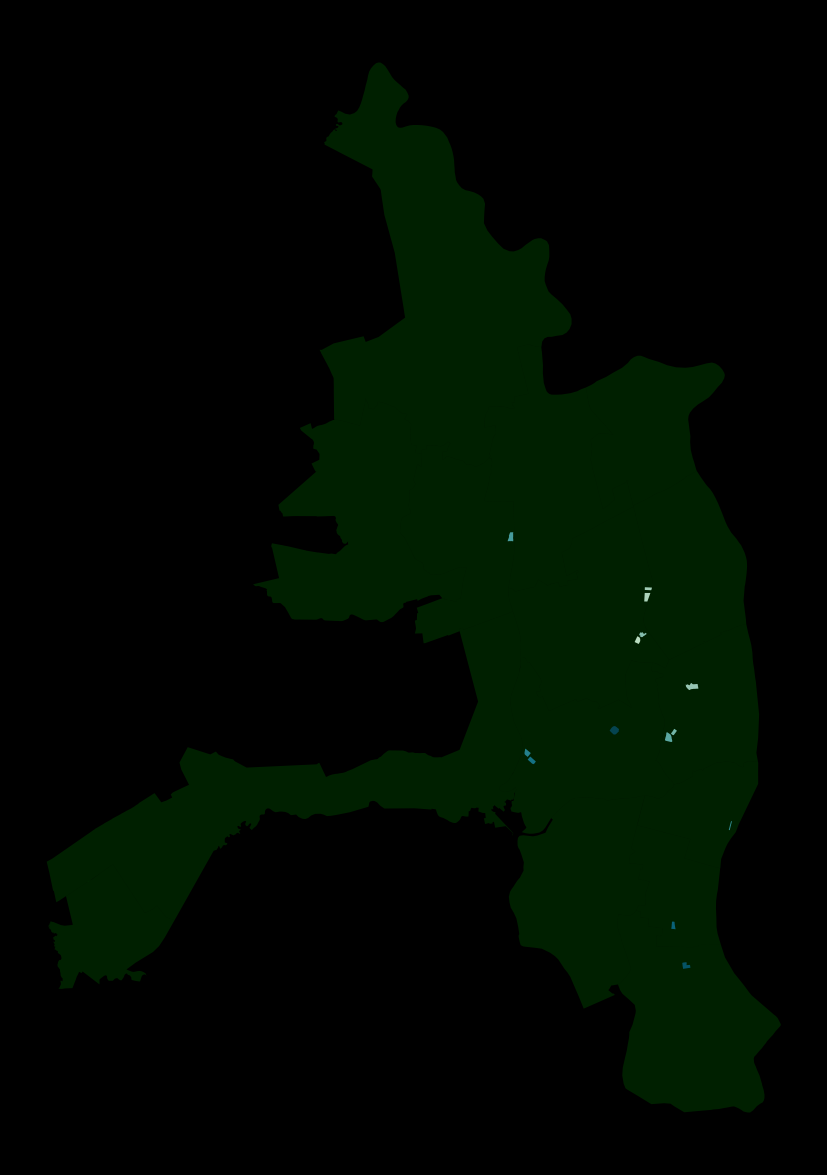

In [143]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))

malls.geometry.plot(ax=ax, cmap='Blues')
dist.iloc[:].geometry.plot(ax=ax, color='green', alpha=0.25)

f.patch.set_facecolor('k')
ax.set_facecolor('k')
ax.axis('off')
f.show()